<a href="https://colab.research.google.com/github/rezkysyaputra/Predict-Student-Performance/blob/main/Pendekatan_Berbasis_Data_untuk_Memprediksi_Nilai_Siswa_Berdasarkan_Faktor_Faktor_Utama_Belajar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pendekatan Berbasis Data untuk Memprediksi Nilai Siswa Berdasarkan Faktor-Faktor Utama Belajar**

- Nama  : Muh. Rezky Syaputra
- NIM   : 22.11.4816

Link dataset: https://www.kaggle.com/datasets/stealthtechnologies/predict-student-performance-dataset/data

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

## 1.   Load Dataset

In [ ]:
# Muat dataset
df = pd.read_csv('/content/data.csv')

In [ ]:
# Tampilkan informasi dataset

print("Informasi dataset:")
df.info()
print("\nkolom:")
print(df.columns)
print("\nData kolom:")
df

Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1388 entries, 0 to 1387
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Socioeconomic Score  1388 non-null   float64
 1   Study Hours          1388 non-null   float64
 2   Sleep Hours          1388 non-null   float64
 3   Attendance (%)       1388 non-null   float64
 4   Grades               1388 non-null   float64
dtypes: float64(5)
memory usage: 54.3 KB

kolom:
Index(['Socioeconomic Score', 'Study Hours', 'Sleep Hours', 'Attendance (%)',
       'Grades'],
      dtype='object')

Data kolom:


,Socioeconomic Score,Study Hours,Sleep Hours,Attendance (%),Grades
0,0.95822,3.4,8.2,53.0,47.0
1,0.85566,3.2,5.9,55.0,35.0
2,0.68025,3.2,9.3,41.0,32.0
3,0.25936,3.2,8.2,47.0,34.0
4,0.60447,3.8,10.0,75.0,33.0
...,...,...,...,...,...
1383,0.44549,5.5,8.0,51.0,41.0
1384,0.52466,4.9,6.5,63.0,37.0
1385,0.88197,3.9,6.2,54.0,36.0
1386,0.47336,3.5,7.3,61.0,34.0


## 2. Exploratory data analysis(EDA)

In [ ]:
df.describe()

,Socioeconomic Score,Study Hours,Sleep Hours,Attendance (%),Grades
count,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000
mean,0.552274,4.560807,8.047262,58.536023,40.691643
std,0.261272,1.897581,1.370700,11.675287,9.467358
min,0.101280,0.800000,4.800000,40.000000,32.000000
25%,0.322118,3.475000,7.000000,49.000000,34.000000
50%,0.545945,3.900000,8.400000,57.000000,35.000000
75%,0.789610,5.900000,9.100000,66.000000,47.000000
max,0.999820,10.000000,10.000000,100.000000,91.000000


In [ ]:
df.corr()

,Socioeconomic Score,Study Hours,Sleep Hours,Attendance (%),Grades
Socioeconomic Score,1.000000,0.002151,0.013618,-0.022793,0.335033
Study Hours,0.002151,1.000000,-0.187204,0.485408,0.810807
Sleep Hours,0.013618,-0.187204,1.000000,-0.105758,-0.124689
Attendance (%),-0.022793,0.485408,-0.105758,1.000000,0.321930
Grades,0.335033,0.810807,-0.124689,0.321930,1.000000


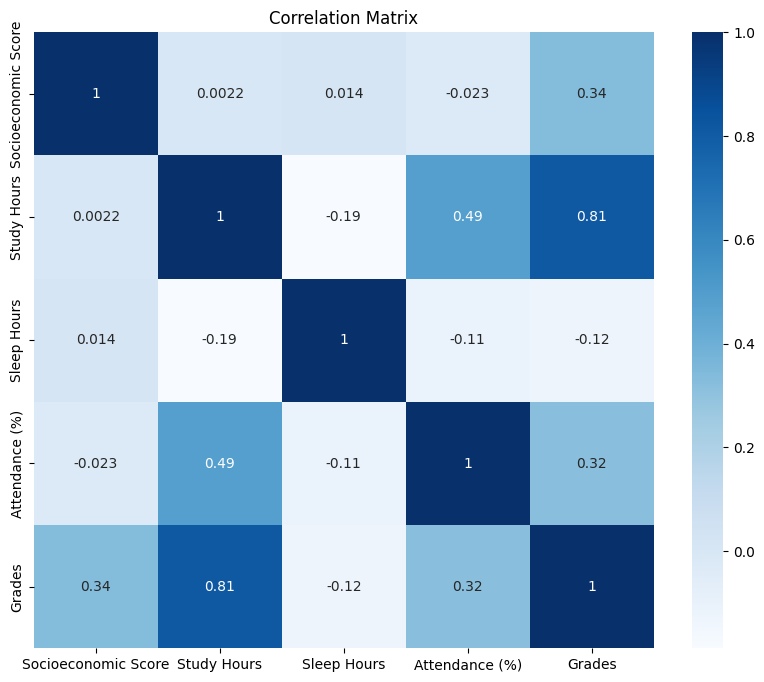

In [ ]:
# analisis korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.show()

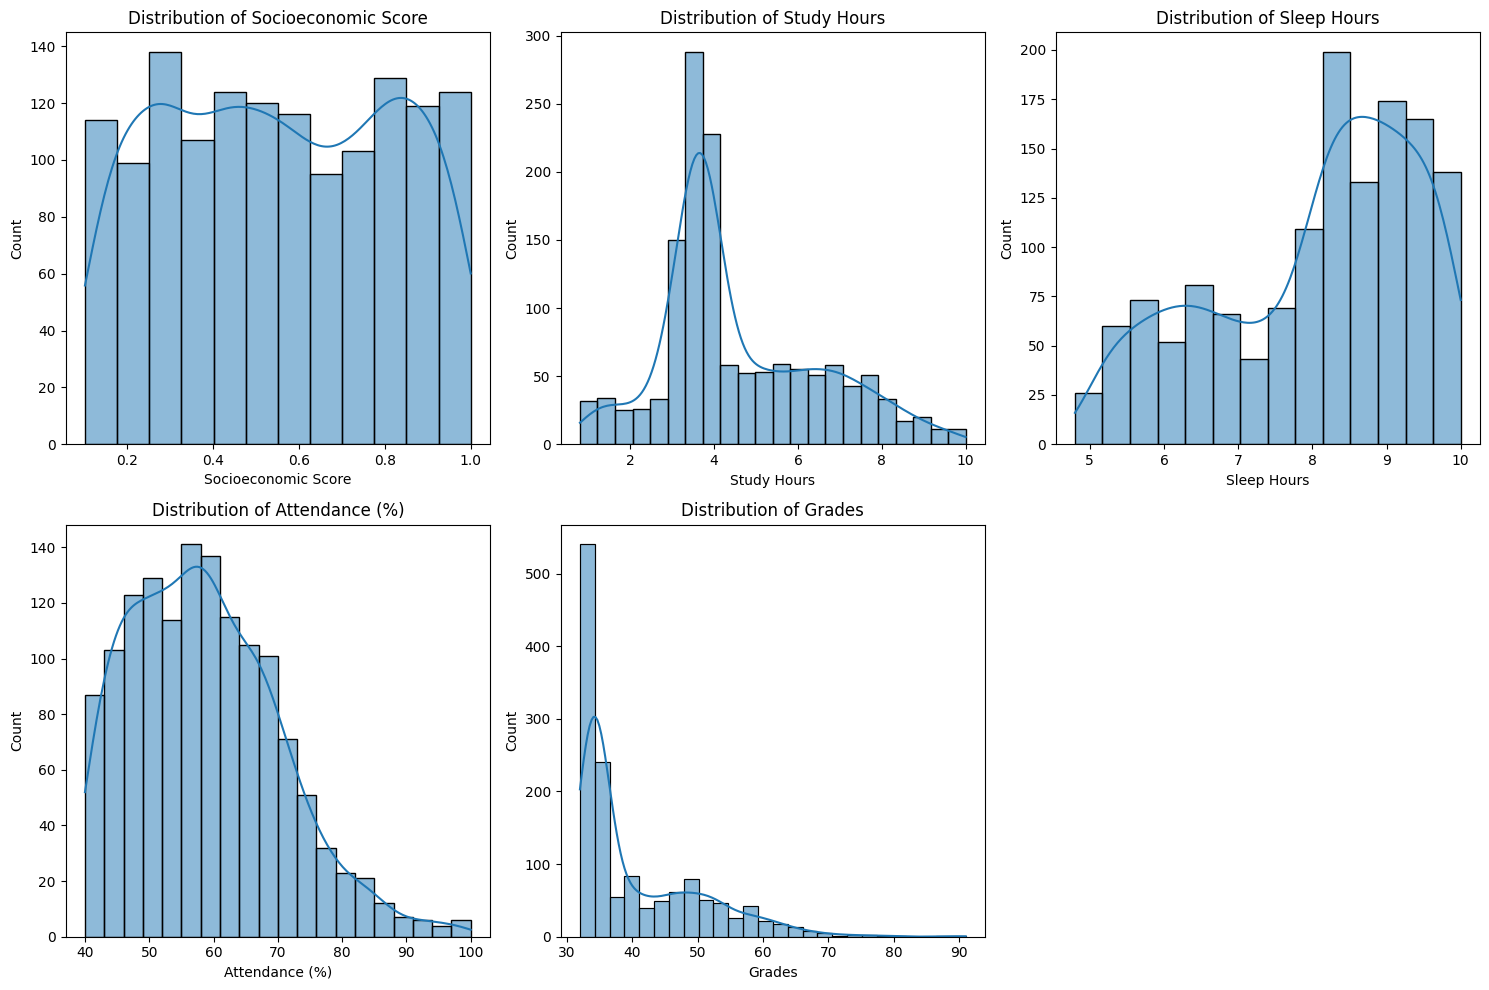

In [ ]:
# Distribution plots
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

## 3. Preprocessing

In [ ]:
# cek data null
df.isnull().sum()

,0
Socioeconomic Score,0
Study Hours,0
Sleep Hours,0
Attendance (%),0
Grades,0


In [ ]:
# pisahkan variabel fitur dan target
features = ['Socioeconomic Score', 'Study Hours', 'Sleep Hours', 'Attendance (%)']
target = 'Grades'

X = df[features]
y = df[target]

In [ ]:
# Bagi data train 20% dan test 80%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 4. Model Training and Evaluation

In [ ]:
# Fungsi evaluasi model
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"\nPerformance Metrics for {model_name}:")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"R-squared (R2 Score): {r2:.2f}")

    return {'RMSE': rmse, 'MAE': mae, 'R2 Score': r2}

In [ ]:
# Inisialisasi model
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'SVR': SVR(kernel='rbf'),
    'MLP Regressor': MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
}

In [ ]:
# Pelatihan dan evaluasi model
results = {}
for model_name, model in models.items():
    print(f"\nTraining and evaluating: {model_name}")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # Evaluasi performa
    performance_metrics = evaluate_model(y_test, y_pred, model_name)
    results[model_name] = performance_metrics

    # Cross-validation
    try:
        cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
        print(f"Cross-validation R2 scores: {cv_scores}")
        print(f"Average CV R2 score: {cv_scores.mean():.2f} (+/- {cv_scores.std() * 2:.2f})")
    except Exception as e:
        print(f"Cross-validation failed for {model_name}: {e}")


Training and evaluating: Linear Regression

Performance Metrics for Linear Regression:
Root Mean Squared Error (RMSE): 4.39
Mean Absolute Error (MAE): 3.39
R-squared (R2 Score): 0.74
Cross-validation R2 scores: [0.77783062 0.76799857 0.77538294 0.79917429 0.74529384]
Average CV R2 score: 0.77 (+/- 0.03)

Training and evaluating: Random Forest

Performance Metrics for Random Forest:
Root Mean Squared Error (RMSE): 1.20
Mean Absolute Error (MAE): 0.89
R-squared (R2 Score): 0.98
Cross-validation R2 scores: [0.97830615 0.97895523 0.9773216  0.97785422 0.97124975]
Average CV R2 score: 0.98 (+/- 0.01)

Training and evaluating: SVR

Performance Metrics for SVR:
Root Mean Squared Error (RMSE): 2.64
Mean Absolute Error (MAE): 1.60
R-squared (R2 Score): 0.91
Cross-validation R2 scores: [0.91775654 0.89760029 0.86775582 0.85602606 0.87150497]
Average CV R2 score: 0.88 (+/- 0.04)

Training and evaluating: MLP Regressor

Performance Metrics for MLP Regressor:
Root Mean Squared Error (RMSE): 1.12
M

## 5.  Feature Importance for Random Forest

               Feature  Importance  Importance (%)
1          Study Hours    0.733942       73.394230
0  Socioeconomic Score    0.254405       25.440529
2          Sleep Hours    0.006057        0.605740
3       Attendance (%)    0.005595        0.559501


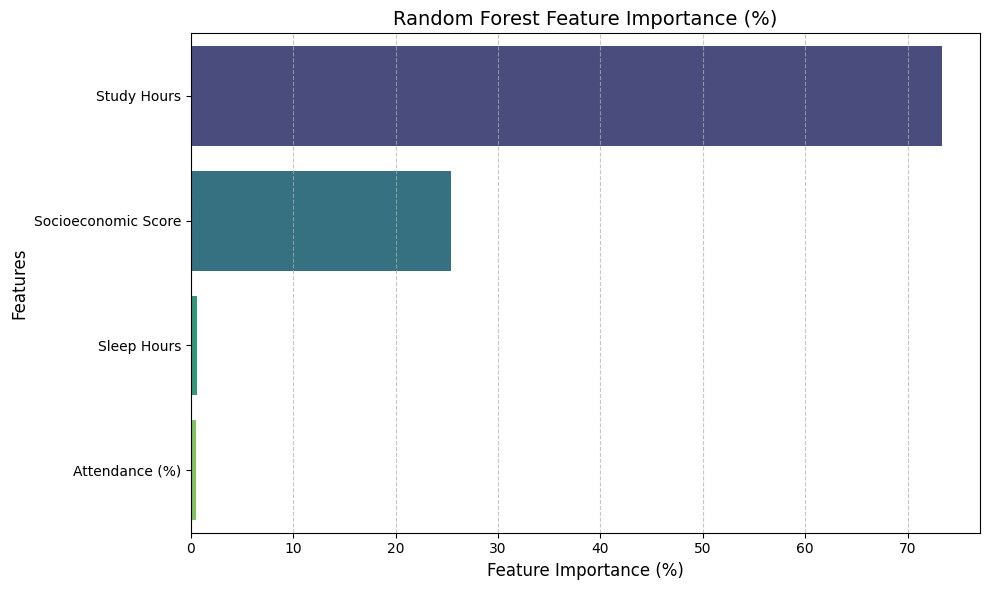

In [ ]:
# Calculate feature importance percentages
feature_importance['Importance (%)'] = (feature_importance['Importance'] / feature_importance['Importance'].sum()) * 100

# Display the feature importance with percentages
print(feature_importance)

# Visualize Feature Importance with percentages
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance (%)', y='Feature', data=feature_importance, palette='viridis')
plt.title('Random Forest Feature Importance (%)', fontsize=14)
plt.xlabel('Feature Importance (%)', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 6.  Model Comparison

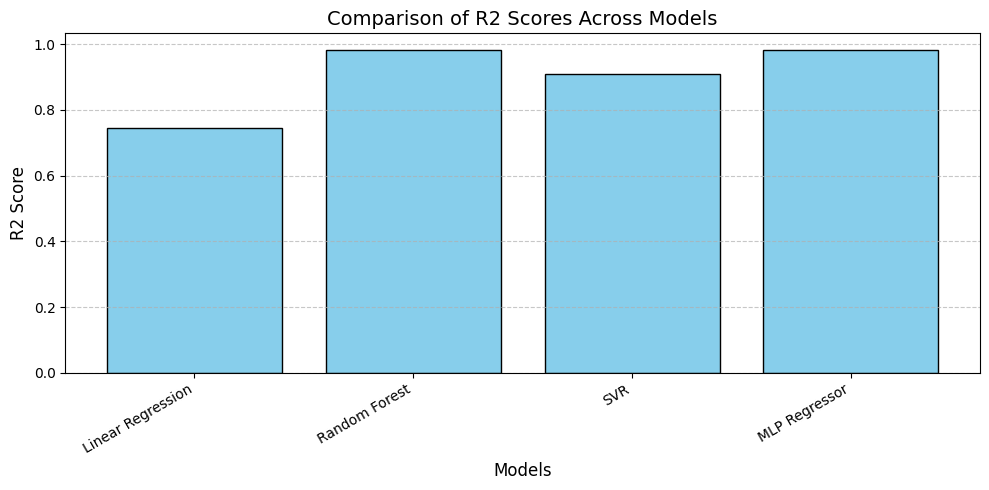

In [ ]:
# Visualisasi perbandingan R2 Scores
plt.figure(figsize=(10, 5))
model_names = list(results.keys())
r2_scores = [results[model]['R2 Score'] for model in model_names]

plt.bar(model_names, r2_scores, color='skyblue', edgecolor='black')
plt.title('Comparison of R2 Scores Across Models', fontsize=14)
plt.xlabel('Models', fontsize=12)
plt.ylabel('R2 Score', fontsize=12)
plt.xticks(rotation=30, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 7.  Predictions vs Actual Values with Best Model

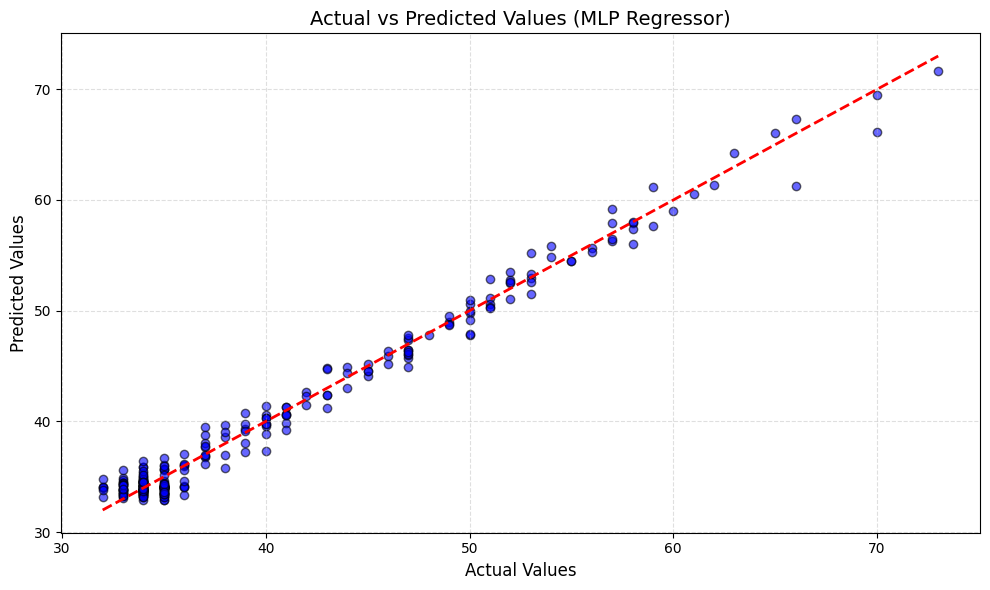

In [ ]:
# Menentukan model terbaik berdasarkan R2 Score
best_model_name = model_names[np.argmax(r2_scores)]
best_model = models[best_model_name]

# Melakukan prediksi menggunakan model terbaik
y_pred_best = best_model.predict(X_test_scaled)

# Visualisasi: Perbandingan nilai aktual dan prediksi
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best, alpha=0.6, color='blue', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.title(f'Actual vs Predicted Values ({best_model_name})', fontsize=14)
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.grid(alpha=0.4, linestyle='--')
plt.tight_layout()
plt.show()